In [1]:
import torch
import torchvision

from utils.graph_utils import make_graph
from hubconf import yolov5s

In [2]:
model = yolov5s(pretrained=True)
model = model.eval()

In [3]:
class Detection(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.m = model

    def forward(self, inp):
        assert inp.shape[0] == 1
        res, = self.m(inp)
        return res['boxes'], res['labels'], res['scores']

In [4]:
tm = torch.jit.trace(Detection(), [torch.randn(1, 3, 224, 224)], check_trace=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  import sys
/usr/local/lib/python3.6/dist-packages/torch/tensor.py:593: RuntimeWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  'incorrect results).', category=RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dtype=torch.float32)).float())) for i in range(dim)]
/mnt

In [5]:
d = make_graph(tm.m, classes_to_visit={})
d.render('./data-bin/output/yolov5.highlevel')

'yolov5.highlevel.svg'

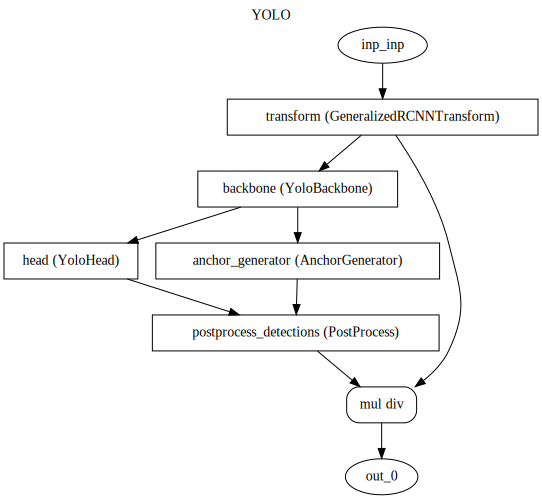

In [6]:
d

In [7]:
d = make_graph(tm.m, classes_to_visit={'YoloHead'})
d.render("./data-bin/output/yolov5.detail")

'yolov5.detail.svg'

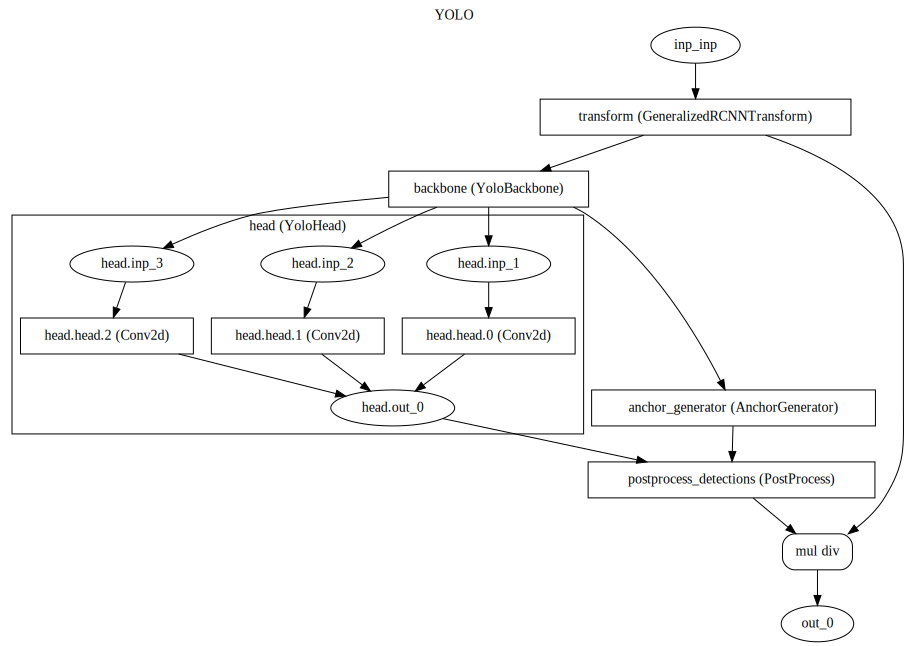

In [8]:
d